# Meta analysis

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import functions as fun
from nistats import thresholding
import numpy as np
import nibabel as nib
import nilearn
from nilearn import masking, plotting
import matplotlib.pyplot as plt
from nimare.dataset import Dataset
import nimare


template = nilearn.datasets.load_mni152_template()
affine = template.affine

level = .05
height_control = 'fdr'
cluster_threshold = 1
sample_size=119

cut_coords=(0, 0, 0)

191030-21:42:09,672 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.2.3)


INFO:nipype.utils:Running nipype version 1.2.3 (latest: 1.2.3)


Get the paths for the unthresholded image for each analysis team, for the given hypothesis.

In [2]:
input_dir = '../data-narps/proc/'
img_paths = fun.get_data_paths(input_dir)

# For now, select the first N studies. 
#N_img = 10
#img_paths = img_paths[:N_img]

Convert the images to the dataset directory that is readable by NiMARE, the meta-analysis package. 

In [3]:
ds_dict = fun.extract_from_paths(img_paths, data=['path', 'coord'], sample_size=sample_size, 
                    level=level, height_control=height_control, cluster_threshold=cluster_threshold)

## Coordinate-based meta-analysis
Using Activation Likelihood Estimation

In [4]:
# Unthresholded ALE image
img_ale, img_p, img_z = fun.run_ALE(ds_dict)

INFO:nimare.dataset:Shared path detected: "/home/neuro/test/data-narps/proc/hypo1_unthresh_"


In [5]:
# Thresholded ALE image with nistats
img_ale_thr_nistats = thresholding.map_threshold(img_ale, alpha=level, 
                                           height_control=height_control,
                                           cluster_threshold=cluster_threshold)[0]

In [6]:
# Thresholded ALE image with Alex's code
img_ale_thr_nimare, img_p_thr, img_z_thr = fun.fdr_threshold([img_ale, img_p, img_z], img_p, q=level)

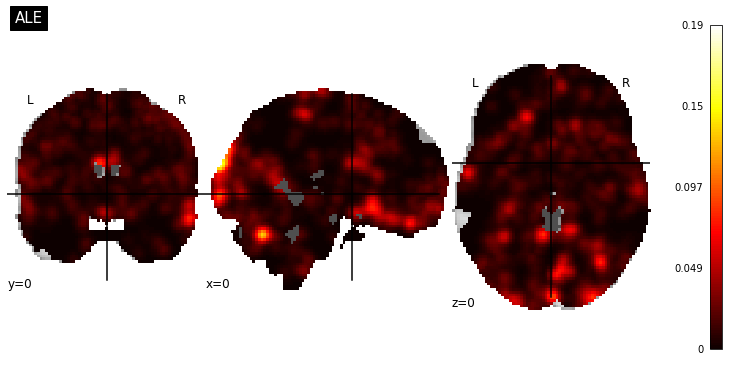

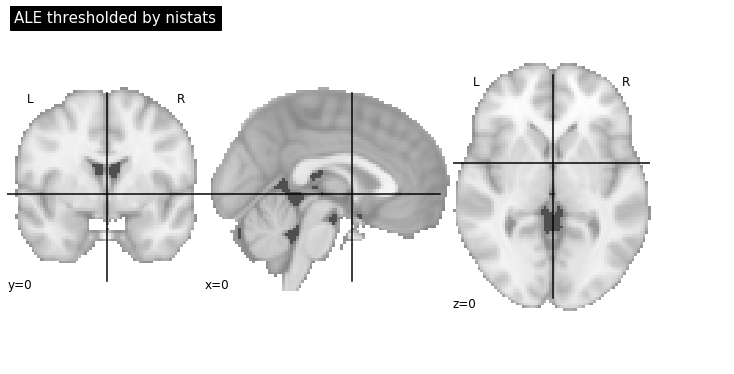

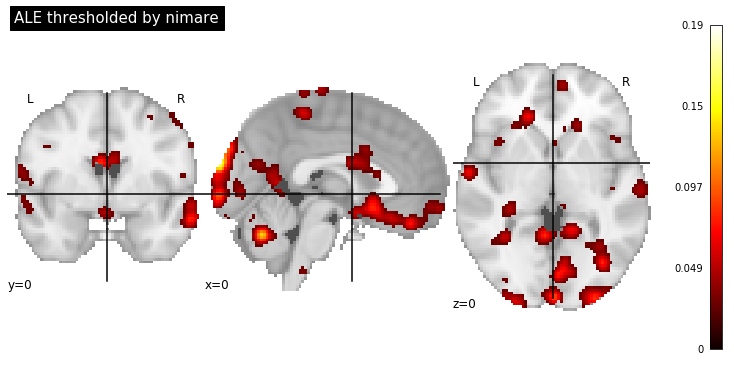

In [7]:
meta_analysis = { 
    'ALE': img_ale,
    'ALE thresholded by nistats': img_ale_thr_nistats,
    'ALE thresholded by nimare': img_ale_thr_nimare,
}
for name, img in meta_analysis.items():
    plotting.plot_stat_map(img, title=name, cut_coords=cut_coords,
                          figure=plt.figure(figsize=(10,5)))   
    plt.savefig('../figures/results_%s.png' %name.replace(' ', '-'))

## Image-based meta-analysis
Using a mixed-effects linear model

In [8]:
# unthresholded MFX image
ma = nimare.meta.ibma.MFX_GLM(cdt=.05, q=.05)
res = ma.fit(Dataset(ds_dict))
img_t_MFX = res.get_map('t')

INFO:nimare.dataset:Shared path detected: "/home/neuro/test/data-narps/proc/hypo1_unthresh_"


191030-21:42:57,271 nipype.interface INFO:
	 stdout 2019-10-30T21:42:57.271040:Log directory is: stats


INFO:nipype.interface:stdout 2019-10-30T21:42:57.271040:Log directory is: stats


191030-21:42:57,274 nipype.interface INFO:
	 stdout 2019-10-30T21:42:57.274268:Setting up:


INFO:nipype.interface:stdout 2019-10-30T21:42:57.274268:Setting up:


191030-21:42:59,201 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.201275:ntptsing=37.000000 


INFO:nipype.interface:stdout 2019-10-30T21:42:59.201275:ntptsing=37.000000 


191030-21:42:59,202 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.201275:


INFO:nipype.interface:stdout 2019-10-30T21:42:59.201275:


191030-21:42:59,203 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.201275:evs_group=1.000000 


INFO:nipype.interface:stdout 2019-10-30T21:42:59.201275:evs_group=1.000000 


191030-21:42:59,204 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.201275:


INFO:nipype.interface:stdout 2019-10-30T21:42:59.201275:


191030-21:42:59,207 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.207624:No f contrasts


INFO:nipype.interface:stdout 2019-10-30T21:42:59.207624:No f contrasts


191030-21:42:59,472 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.472009:


INFO:nipype.interface:stdout 2019-10-30T21:42:59.472009:


191030-21:42:59,474 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.472009:WARNING: The passed in varcope file, /home/neuro/test/analyses/mfx_glm/varcope.nii.gz, contains voxels inside the mask with zero (or negative) values. These voxels will be excluded from the analysis.


INFO:nipype.interface:stdout 2019-10-30T21:42:59.472009:WARNING: The passed in varcope file, /home/neuro/test/analyses/mfx_glm/varcope.nii.gz, contains voxels inside the mask with zero (or negative) values. These voxels will be excluded from the analysis.


191030-21:42:59,480 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.480146:nevs=1


INFO:nipype.interface:stdout 2019-10-30T21:42:59.480146:nevs=1


191030-21:42:59,482 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.480146:ntpts=37


INFO:nipype.interface:stdout 2019-10-30T21:42:59.480146:ntpts=37


191030-21:42:59,483 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.480146:ngs=1


INFO:nipype.interface:stdout 2019-10-30T21:42:59.480146:ngs=1


191030-21:42:59,485 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.480146:nvoxels=227461


INFO:nipype.interface:stdout 2019-10-30T21:42:59.480146:nvoxels=227461


191030-21:42:59,538 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.538885:Running:


INFO:nipype.interface:stdout 2019-10-30T21:42:59.538885:Running:


191030-21:42:59,540 nipype.interface INFO:
	 stdout 2019-10-30T21:42:59.538885:nmaskvoxels=227461


INFO:nipype.interface:stdout 2019-10-30T21:42:59.538885:nmaskvoxels=227461


191030-21:43:41,571 nipype.interface INFO:
	 stdout 2019-10-30T21:43:41.571901: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100


INFO:nipype.interface:stdout 2019-10-30T21:43:41.571901: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100


191030-21:43:41,576 nipype.interface INFO:
	 stdout 2019-10-30T21:43:41.576146:nmaskvoxels=227461


INFO:nipype.interface:stdout 2019-10-30T21:43:41.576146:nmaskvoxels=227461


191030-21:43:41,577 nipype.interface INFO:
	 stdout 2019-10-30T21:43:41.576146:Saving results


INFO:nipype.interface:stdout 2019-10-30T21:43:41.576146:Saving results


191030-21:43:46,774 nipype.interface INFO:
	 stdout 2019-10-30T21:43:46.774035:


INFO:nipype.interface:stdout 2019-10-30T21:43:46.774035:


191030-21:43:46,775 nipype.interface INFO:
	 stdout 2019-10-30T21:43:46.774035:Log directory was: stats


INFO:nipype.interface:stdout 2019-10-30T21:43:46.774035:Log directory was: stats


191030-21:43:48,5 nipype.interface INFO:
	 stdout 2019-10-30T21:43:48.005097:DLH 0.0936933


INFO:nipype.interface:stdout 2019-10-30T21:43:48.005097:DLH 0.0936933


191030-21:43:48,7 nipype.interface INFO:
	 stdout 2019-10-30T21:43:48.005097:VOLUME 227461


INFO:nipype.interface:stdout 2019-10-30T21:43:48.005097:VOLUME 227461


191030-21:43:48,8 nipype.interface INFO:
	 stdout 2019-10-30T21:43:48.005097:RESELS 49.8037


INFO:nipype.interface:stdout 2019-10-30T21:43:48.005097:RESELS 49.8037


191030-21:43:48,272 nipype.interface INFO:
	 stdout 2019-10-30T21:43:48.272719:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


INFO:nipype.interface:stdout 2019-10-30T21:43:48.272719:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


191030-21:43:48,274 nipype.interface INFO:
	 stdout 2019-10-30T21:43:48.272719:1	64536	0	95.7	9.26	-44	-50	-10	0.849	-35.9	10.9	4.21	-46	-16	52	0.817


INFO:nipype.interface:stdout 2019-10-30T21:43:48.272719:1	64536	0	95.7	9.26	-44	-50	-10	0.849	-35.9	10.9	4.21	-46	-16	52	0.817


191030-21:43:48,986 nipype.interface INFO:
	 stdout 2019-10-30T21:43:48.986375:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


INFO:nipype.interface:stdout 2019-10-30T21:43:48.986375:Cluster Index	Voxels	P	-log10(P)	MAX	MAX X (mm)	MAX Y (mm)	MAX Z (mm)	COG X (mm)	COG Y (mm)	COG Z (mm)	COPE-MAX	COPE-MAX X (mm)	COPE-MAX Y (mm)	COPE-MAX Z (mm)	COPE-MEAN


191030-21:43:48,988 nipype.interface INFO:
	 stdout 2019-10-30T21:43:48.986375:1	81293	0	112	9.08	14	34	52	-3.35	-8.62	22.5	3.81	-42	-26	64	1.11


INFO:nipype.interface:stdout 2019-10-30T21:43:48.986375:1	81293	0	112	9.08	14	34	52	-3.35	-8.62	22.5	3.81	-42	-26	64	1.11
INFO:nimare.meta.ibma:Cleaning up...


In [9]:
# thresholded MFX image using nimare 
# AT THIS POINT IT HASN'T BEEN THRESHOLDED, ONLY CONVERTED TO P-VALUES (I THINK)
fdr_corrector = nimare.correct.FDRCorrector(method='indep', q=level)
p = fdr_corrector.transform(res)
img_p_MFX_thr_nimare = p.get_map('p')

In [10]:
# Thresholded MFX image using nistats
img_t_MFX_thr_nistats = thresholding.map_threshold(img_t_MFX, alpha=level,
                                            height_control=height_control,
                                            cluster_threshold=cluster_threshold)[0]

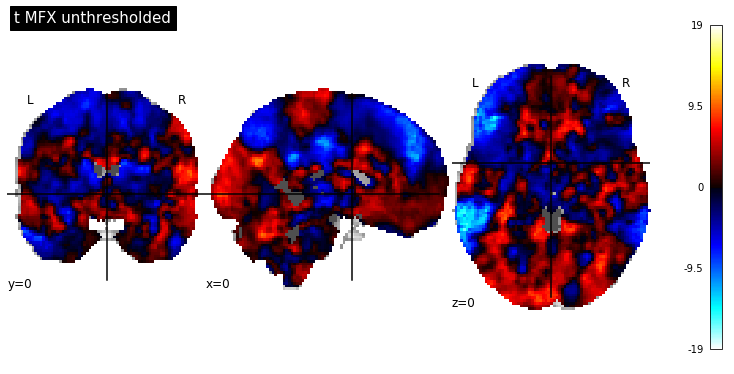

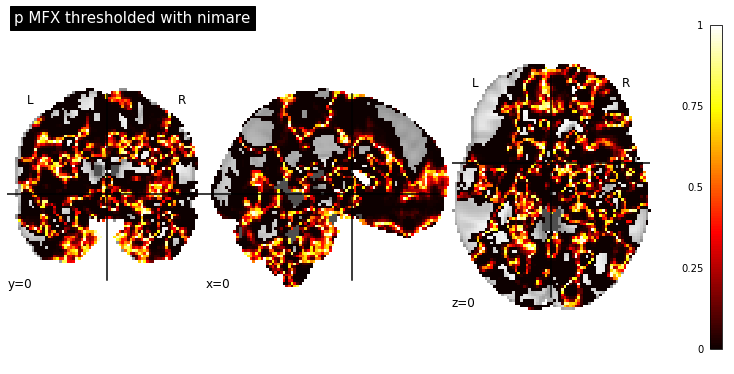

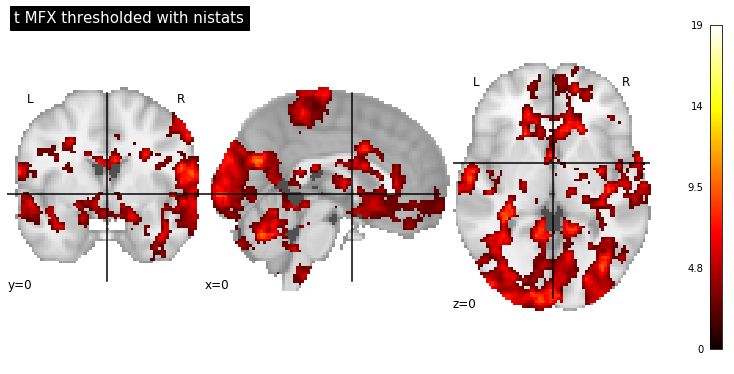

In [11]:
meta_analysis = { 
    #'ALE': img_ale,
    #'ALE thresholded': img_ale_thr,
    't MFX unthresholded': img_t_MFX,
    'p MFX thresholded with nimare': img_p_MFX_thr_nimare,
    't MFX thresholded with nistats': img_t_MFX_thr_nistats,
}
for name, img in meta_analysis.items():
    plotting.plot_stat_map(img, title=name, cut_coords=cut_coords,
                          figure=plt.figure(figsize=(10,5)))   
    plt.savefig('../figures/results_%s.png' %name.replace(' ', '-'))